# Задача

Retention – один из самых важных показателей в компании. 
Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока). 

Данные:

    - problem1-reg_data.csv  – данные о времени регистрации
    - problem1-auth_data.csv – данные о времени захода пользователей в игру

Функция должна быть написана на python

#####################################################

In [2]:
import pandas as pd
import numpy as np
import datetime as dd

# импортируем библиотеку с написанной функцией по подсчету retention
import my_retention

In [3]:
path_1 = 'problem1-auth_data.csv'
path_2 = 'problem1-reg_data.csv'

auth = pd.read_csv(path_1, sep=';')
reg  = pd.read_csv(path_2, sep=';')

reg['reg_date']   = reg .reg_ts .apply(lambda x: dd.datetime.fromtimestamp(x))
auth['auth_date'] = auth.auth_ts.apply(lambda x: dd.datetime.fromtimestamp(x))

In [4]:
print(reg.dtypes)
print('----------')
print(auth.dtypes)

reg_ts               int64
uid                  int64
reg_date    datetime64[ns]
dtype: object
----------
auth_ts               int64
uid                   int64
auth_date    datetime64[ns]
dtype: object


In [5]:
print(reg.shape)
print('----------')
print(auth.shape)

(1000000, 3)
----------
(9601013, 3)


In [6]:
print(reg.uid.nunique())
print('----------')
print(auth.uid.nunique())

1000000
----------
1000000


count        1000000
unique          5110
top       2020-09-22
freq            1641
Name: reg_date, dtype: object


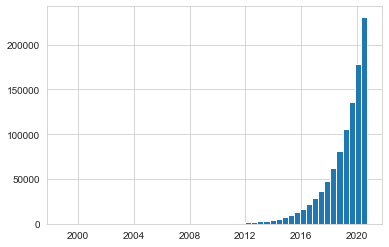

In [99]:
# plt.figure(figsize=(10,4))
reg.reg_date.hist(bins=50)
print(reg.reg_date.describe(datetime_is_numeric=True))

count        9601013
unique          6171
top       2020-09-21
freq           15943
Name: auth_date, dtype: object


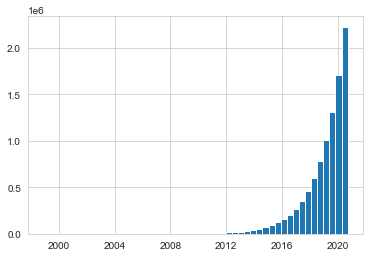

In [100]:
# plt.figure(figsize=(10,4))
auth.auth_date.hist(bins=50)
print(auth.auth_date.describe(datetime_is_numeric=True))

In [12]:
df = auth[['uid', 'auth_date']].merge(reg[['uid', 'reg_date']], on='uid')

In [13]:
# Проверим, все ли первые авторизации были произведены в день регистрации
first_auth_dates = df.groupby('uid', as_index=False)\
                     .agg({'auth_date': 'min'})\
                     .rename(columns={'auth_date': 'first_auth_date'})
df.merge(first_auth_dates, on='uid').query('reg_date != first_auth_date')

# Таких ситуаций не было => день регистрации == день первой авторизации

Empty DataFrame
Columns: [uid, auth_date, reg_date, first_auth_date]
Index: []

In [14]:
# Проверим не было ли авторизаций ранее даты регистрации
df.query('auth_date < reg_date')

# Таких ситуаций не было

Empty DataFrame
Columns: [uid, auth_date, reg_date]
Index: []

##########################################################################

    Используя функцию retention_rate посмотрим на:
        - retention последних двух недель
        - retention последнего месяца
        - rolling retention 10-го дня за последние 60 дней
        - rolling retention 14-го дня за последние полгода
        
##########################################################################

In [7]:
# Возмем только дату из datetime
reg .reg_date  = reg .reg_date .dt.date
auth.auth_date = auth.auth_date.dt.date

C:\Users\Михаил\Karpov_Courses\9_final_project\Var_1\0_my\my_retention.py:149: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_tick_labels)


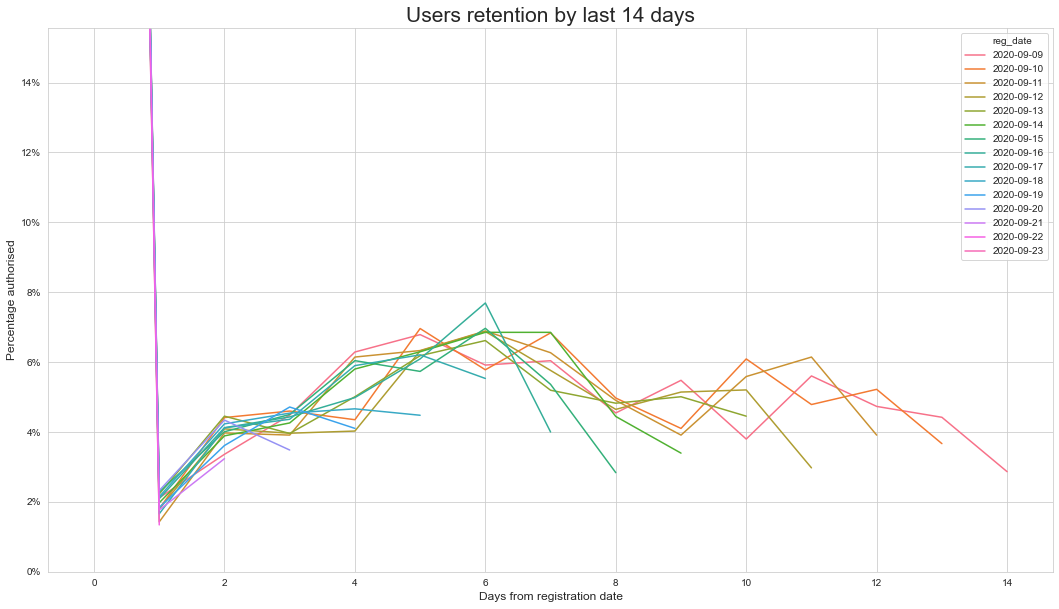

In [8]:
# Посмотрим на retention последних двух недель
res_1 = my_retention.retention_rate(reg, 
                                    auth, 
                                    n_days=14,
                                    plot='lineplot')

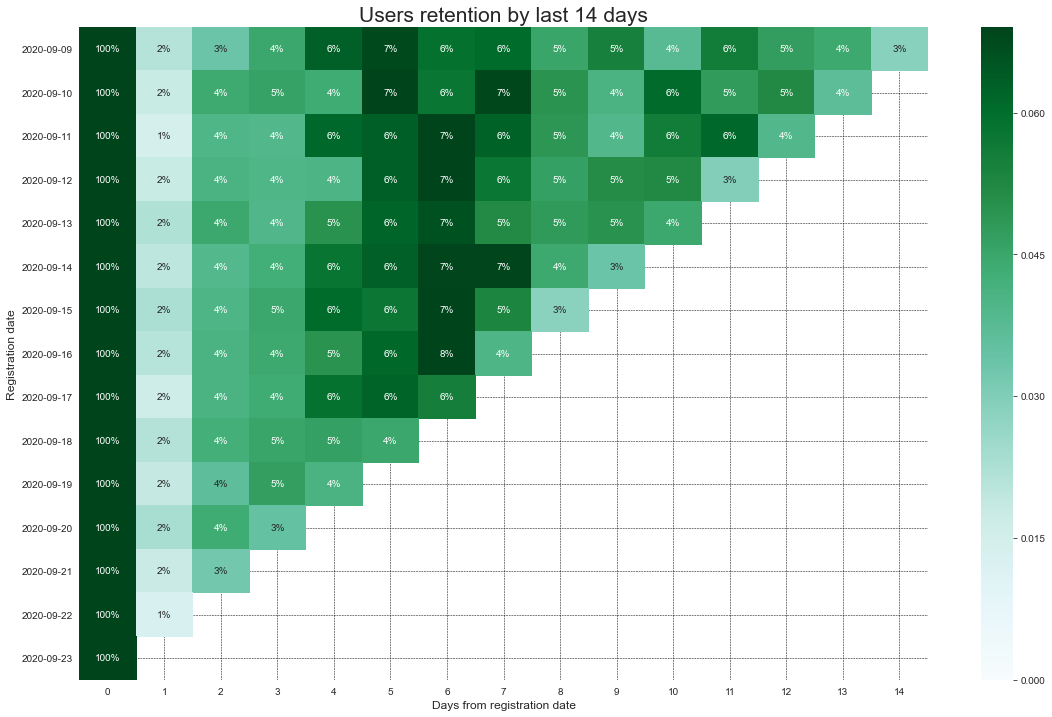

In [9]:
# Общая тенденция видна на графике
# Взглянем на heatmap

res_1 = my_retention.retention_rate(reg, 
                                    auth, 
                                    n_days=14,
                                    plot='heatmap')

In [10]:
# Функция renetion_rate возвращает словарь с двумя ключами:
#     - 'table' - аггрегированные данные, которые можно использовать для дальнейшего исследования данных
#     - 'pivot' - сводная таблица с данными по retention rate

# Можем не выводить визуализацию, а ограничиться только выводом сводной таблицы
res_1 = my_retention.retention_rate(reg, 
                                    auth, 
                                    n_days=14, 
                                    plot=None)
res_1['pivot']

days_from_reg      0      1      2      3      4      5      6      7      8   \
reg_date                                                                        
2020-09-09     100.0%  2.12%  3.36%  4.48%  6.29%  6.79%  5.92%  6.04%  4.54%   
2020-09-10     100.0%   1.8%  4.41%   4.6%  4.35%  6.96%  5.78%  6.84%  4.97%   
2020-09-11     100.0%  1.43%  3.97%  3.91%  6.14%  6.33%  6.89%  6.27%   4.9%   
2020-09-12     100.0%   1.8%  4.09%  3.96%  4.03%  6.32%  6.88%  5.76%  4.65%   
2020-09-13     100.0%  2.23%  4.45%  3.96%  5.01%  6.18%  6.62%   5.2%  4.82%   
2020-09-14     100.0%  1.98%  3.89%  4.26%   5.8%   6.3%  6.85%  6.85%  4.44%   
2020-09-15     100.0%  2.28%  4.01%   4.5%  6.04%  5.73%  6.97%  5.36%  2.84%   
2020-09-16     100.0%  2.09%  4.12%  4.43%  4.98%  6.09%  7.69%   4.0%    NaN   
2020-09-17     100.0%  1.66%  4.12%  4.36%   5.9%  6.21%  5.53%    NaN    NaN   
2020-09-18     100.0%  2.15%  4.23%  4.54%  4.66%  4.48%    NaN    NaN    NaN   
2020-09-19     100.0%  1.84%  3.61%  4.72%   4.1%    NaN    NaN    NaN    NaN   
2020-09-20     100.0%  2.32%  4.34%  3.48%    NaN    NaN    NaN    NaN    NaN   
2020-09-21     100.0%  1.77%  3.24%    NaN    NaN    NaN    NaN    NaN    NaN   
2020-09-22     100.0%  1.34%    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2020-09-23     100.0%    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

days_from_reg     9      10     11     12     13     14  
reg_date                                                 
2020-09-09     5.48%   3.8%   5.6%  4.73%  4.42%  2.86%  
2020-09-10      4.1%  6.09%  4.79%  5.22%  3.67%    NaN  
2020-09-11     3.91%  5.59%  6.14%  3.91%    NaN    NaN  
2020-09-12     5.14%   5.2%  2.97%    NaN    NaN    NaN  
2020-09-13     5.01%  4.45%    NaN    NaN    NaN    NaN  
2020-09-14      3.4%    NaN    NaN    NaN    NaN    NaN  
2020-09-15       NaN    NaN    NaN    NaN    NaN    NaN  
2020-09-16       NaN    NaN    NaN    NaN    NaN    NaN  
2020-09-17       NaN    NaN    NaN    NaN    NaN    NaN  
2020-09-18       NaN    NaN    NaN    NaN    NaN    NaN  
2020-09-19       NaN    NaN    NaN    NaN    NaN    NaN  
2020-09-20       NaN    NaN    NaN    NaN    NaN    NaN  
2020-09-21       NaN    NaN    NaN    NaN    NaN    NaN  
2020-09-22       NaN    NaN    NaN    NaN    NaN    NaN  
2020-09-23       NaN    NaN    NaN    NaN    NaN    NaN

In [11]:
# По ключу 'table' можно получить аггрегированную таблицу для дальнейшего исследования

res_1['table']

reg_date  days_from_reg  uids  regged_uids  percentage
0    2020-09-09              0  1606         1606     1.00000
1    2020-09-09              1    34         1606     0.02117
2    2020-09-09              2    54         1606     0.03362
3    2020-09-09              3    72         1606     0.04483
4    2020-09-09              4   101         1606     0.06289
..          ...            ...   ...          ...         ...
115  2020-09-21              1    29         1638     0.01770
116  2020-09-21              2    53         1638     0.03236
117  2020-09-22              0  1641         1641     1.00000
118  2020-09-22              1    22         1641     0.01341
119  2020-09-23              0  1253         1253     1.00000

[120 rows x 5 columns]

C:\Users\Михаил\Karpov_Courses\9_final_project\Var_1\0_my\my_retention.py:149: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_tick_labels)


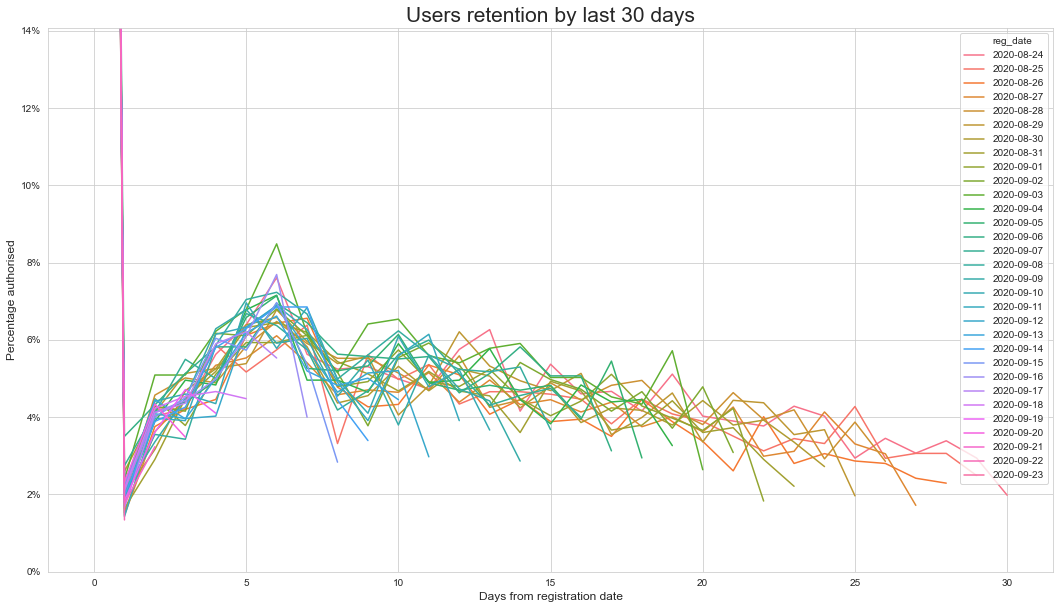

In [12]:
# Взглянем на retention последнего месяца
res_2 = my_retention.retention_rate(reg, 
                                    auth, 
                                    n_days=30, 
                                    plot='lineplot')

C:\Users\Михаил\Karpov_Courses\9_final_project\Var_1\0_my\my_retention.py:149: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_tick_labels)


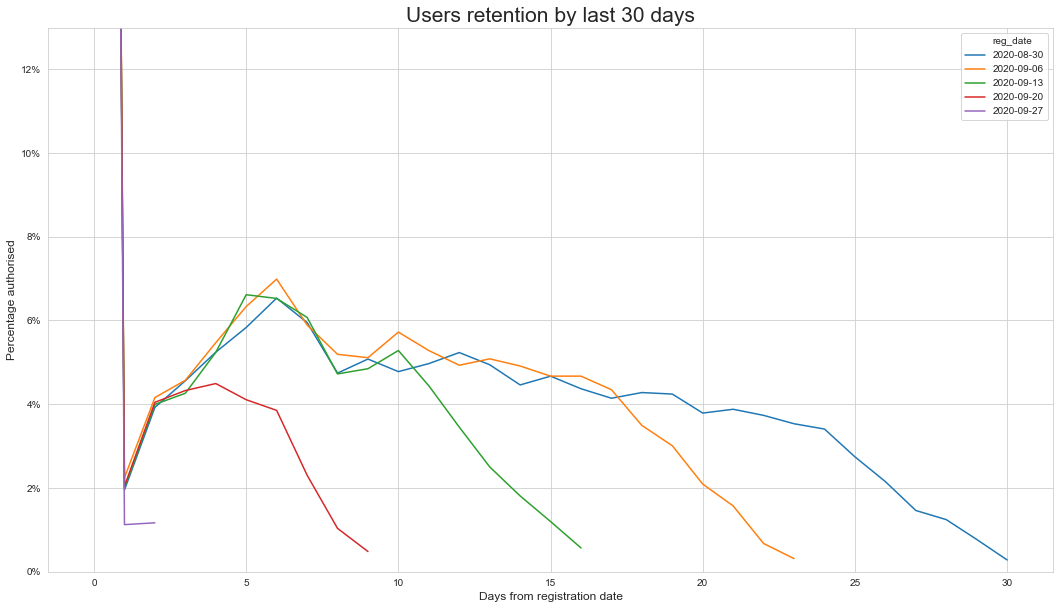

In [13]:
# Из-за большого количество когорт пользователей (по дням) график читается довольно плохо
# Используя аргумент resample можем аггрегировать когорты по неделям и по месяцам

res_2 = my_retention.retention_rate(reg, 
                                    auth, 
                                    n_days=30, 
                                    resample='W',
                                    plot='lineplot')

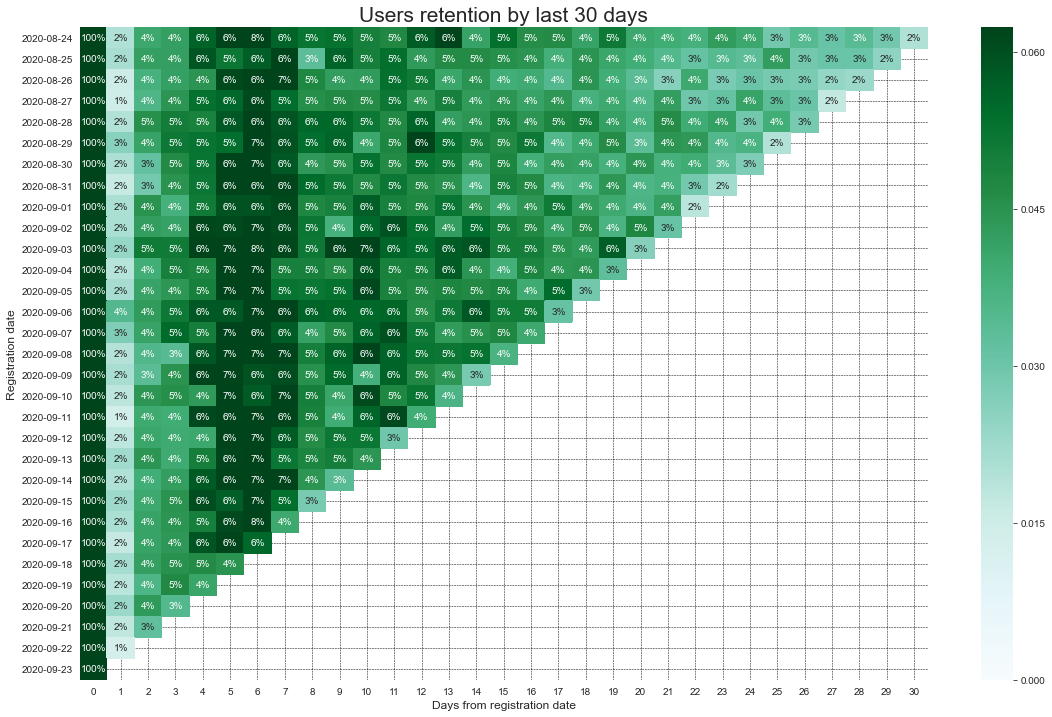

In [14]:
# Взглянем на heatmap
res_2 = my_retention.retention_rate(reg, 
                                    auth, 
                                    n_days=30, 
                                    plot='heatmap')

In [17]:
# Очевидно, что в первые дни после регистрации возвращается крайне мало пользователей
# Но с 5 по 7 день после регистрации возвращается в среднем 6-7% пользователей

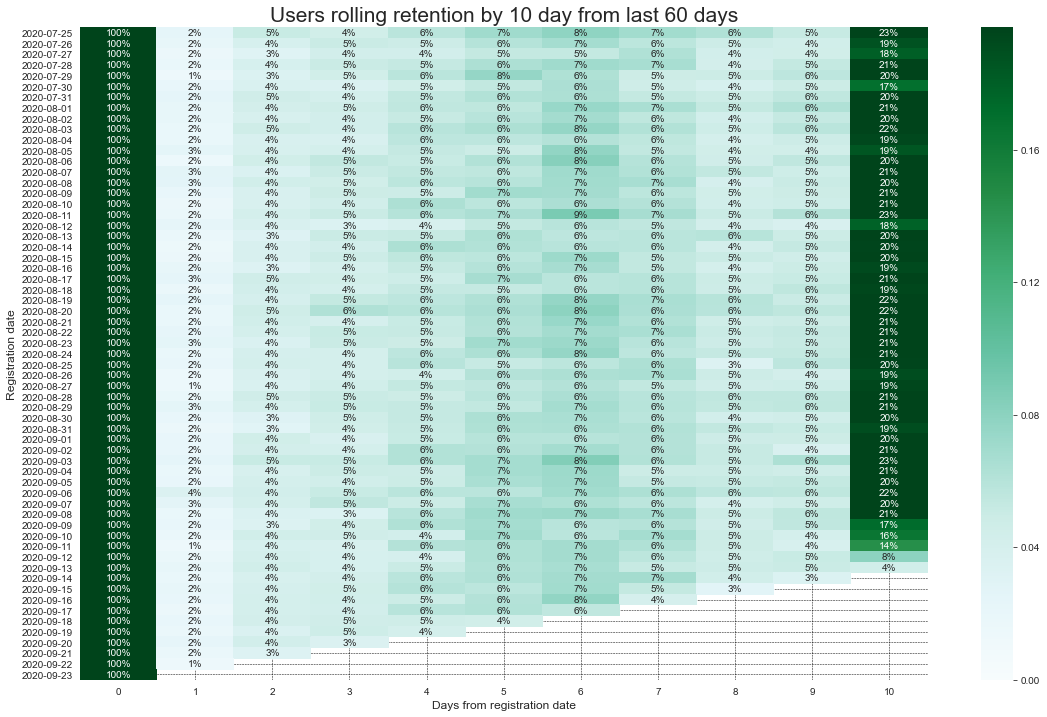

In [25]:
# Взглянем на rolling retention 14-го дня за последние 60 дней
res_3 = my_retention.retention_rate(reg, 
                                    auth, 
                                    n_days=60, 
                                    z_day=10, 
                                    plot='heatmap')

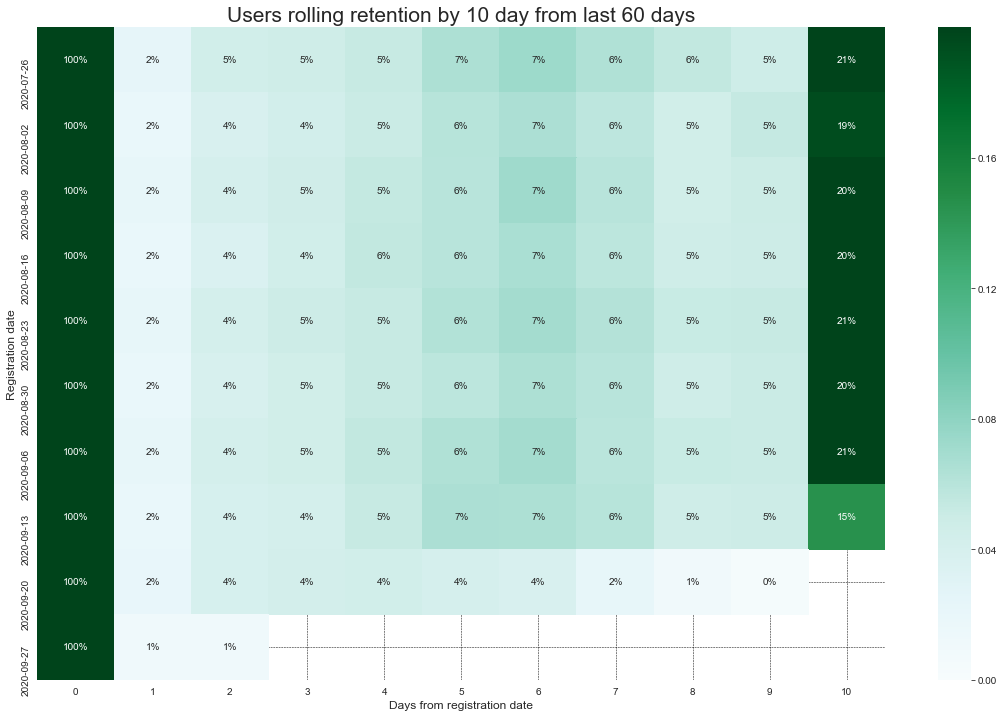

In [29]:
# Очевидно, что спустя неделю и позднее в продукт возвращается примерно 20% пользователей
# Такая визуализация тоже читается довольно затруднительно
# Аггрегируем когорты по неделям
res_3 = my_retention.retention_rate(reg, 
                                    auth, 
                                    n_days=60, 
                                    z_day=10,
                                    resample='W',
                                    plot='heatmap')

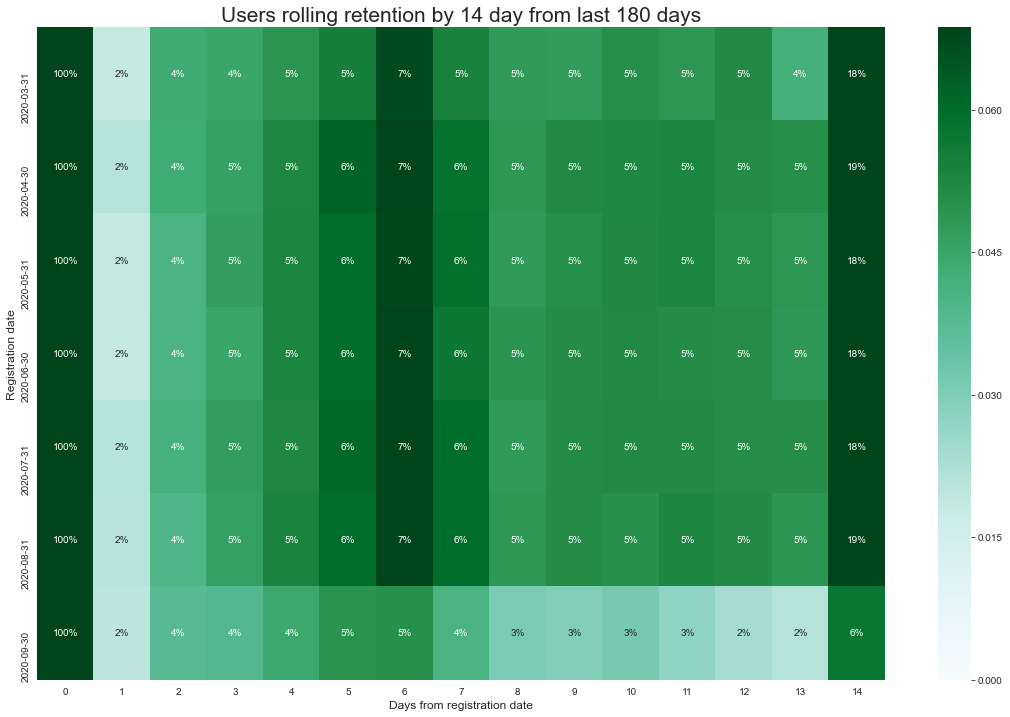

In [21]:
# Посмотрим rolling retention 14-го дня, но за последние полгода с аггрегацией по месяцам
res_4 = my_retention.retention_rate(reg, 
                                    auth, 
                                    n_days=180, 
                                    z_day=14,
                                    resample='M',
                                    plot='heatmap')

In [22]:
res_4['pivot']

days_from_reg      0      1      2      3      4      5      6      7      8   \
reg_date                                                                        
2020-03-31     100.0%  1.88%  4.37%   4.5%  4.89%  5.48%  6.78%  5.41%  4.79%   
2020-04-30     100.0%   2.1%  4.32%   4.6%  5.28%  6.22%  6.89%  5.85%  4.83%   
2020-05-31     100.0%   1.9%   4.1%  4.68%  5.32%  5.99%  6.79%  5.92%  4.78%   
2020-06-30     100.0%  1.85%  4.08%  4.51%  5.33%   6.0%  6.96%  5.66%  4.93%   
2020-07-31     100.0%  2.07%  4.18%  4.72%  5.24%  6.08%  6.94%  5.96%  4.79%   
2020-08-31     100.0%  2.05%  3.95%  4.62%  5.35%  6.01%  6.85%   6.0%  4.83%   
2020-09-30     100.0%   2.0%  3.76%  3.84%  4.43%  4.95%  5.04%   4.1%  3.11%   

days_from_reg     9      10     11     12     13      14  
reg_date                                                  
2020-03-31     4.74%  5.06%  4.86%  5.18%  4.22%  17.51%  
2020-04-30      5.2%  5.27%  5.33%  5.11%  5.05%  18.57%  
2020-05-31     5.05%  5.21%  5.31%  5.04%  4.87%  18.48%  
2020-06-30     5.11%  5.19%   5.1%  5.09%  4.82%  18.25%  
2020-07-31     5.11%  5.17%  5.15%  5.09%  5.09%  18.41%  
2020-08-31     5.12%  5.01%  5.33%  5.17%   4.9%   18.5%  
2020-09-30     2.96%  3.15%  2.74%  2.35%  2.11%   5.75%

##########################################################################

    Таким образом можно сказать, что:
        - общий retention приложения весьма низкий
        - в первые дни после регистрации возвращается крайне мало пользователей (около 2%)
        - с 5 по 7 день количество пользователей возрастает, но после снова постепенно убывает
        - на 10-й день и после него в приложение заходят в среднем около 18-20% пользователей
        
##########################################################################